## Main Goal
We are building and comparing various time series and machine learning models to predict Bitcoin prices, aiming to identify the most accurate methods for forecasting future cryptocurrency trends.

### Data Understanding
The dataset has one csv file for each currency. Price history is available on a daily basis from April 28, 2013.  
This dataset has the historical price information of some of the top crypto currencies by market capitalization.

1. **Date** : date of observation
2. **Open** : Opening price on the given day
3. **High** : Highest price on the given day
4. **Low** : Lowest price on the given day
5. **Close** : Closing price on the given day
6. **Volume** : Volume of transactions on the given day
7. **Market Cap** : Market capitalization in USD

The dataset is downloaded from: [https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?resource=download]

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("datasets/bitcoins/coin_Bitcoin.csv")

In [3]:
dataset.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [4]:
dataset.shape

(2991, 10)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [6]:
dataset.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [7]:
dataset.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

### Exploratory Data Analysis
#### What is the overall trend of Bitcoin's closing price over the entire time period?

In [44]:
# Converting the 'date' format 
dataset['Date'] = pd.to_datetime(dataset['Date'])
# Sort dataset by date
dataset = dataset.sort_values('Date')

In [45]:
dataset['Year'] = dataset['Date'].dt.year

In [46]:
# Grouping by Year and getting the average closing price.
yearly_trend = dataset.groupby('Year')['Close'].mean()

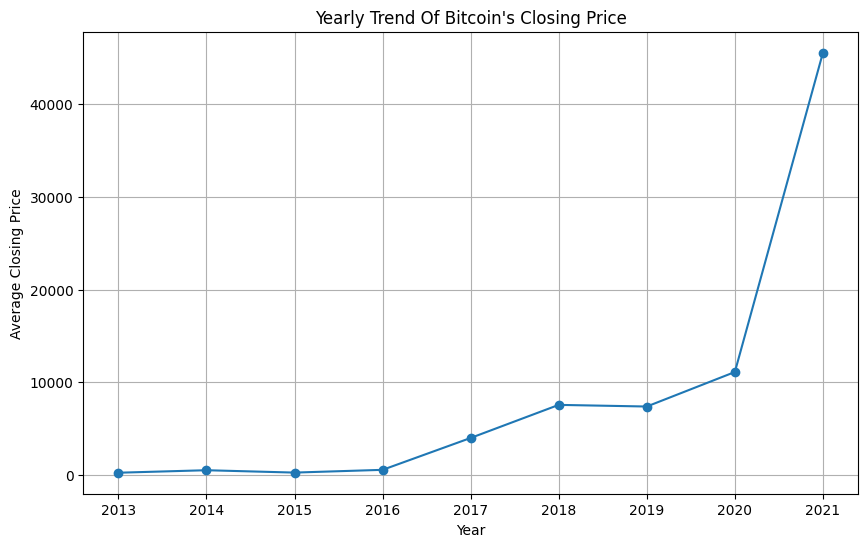

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.title("Yearly Trend Of Bitcoin's Closing Price")
plt.grid(True)
plt.show()

> The analysis of Bitcoin's average closing price reveals a remarkable upward trend. From 2013 to 2016, the price remained relatively low, almost negligible. In 2017, Bitcoin experienced a significant surge, with the average closing price reaching around $5,000. This upward trajectory continued, and by 2020, the average closing price climbed to approximately $11,000. The trend reached a peak in 2021, with an average closing price skyrocketing to around $45,000. This indicates a dramatic increase in the value of Bitcoin over the observed period.  

#### How has the volatility of Bitcoin's price changed over time?

In [48]:
# Calculate daily returns
dataset['Daily Return'] = dataset['Close'].pct_change()

# Calculate rolling standard deviation (volatility) over a 30-day window (can be adjusted)
dataset['30-Day Volatility'] = dataset['Daily Return'].rolling(window=30).std() * (30**0.5)

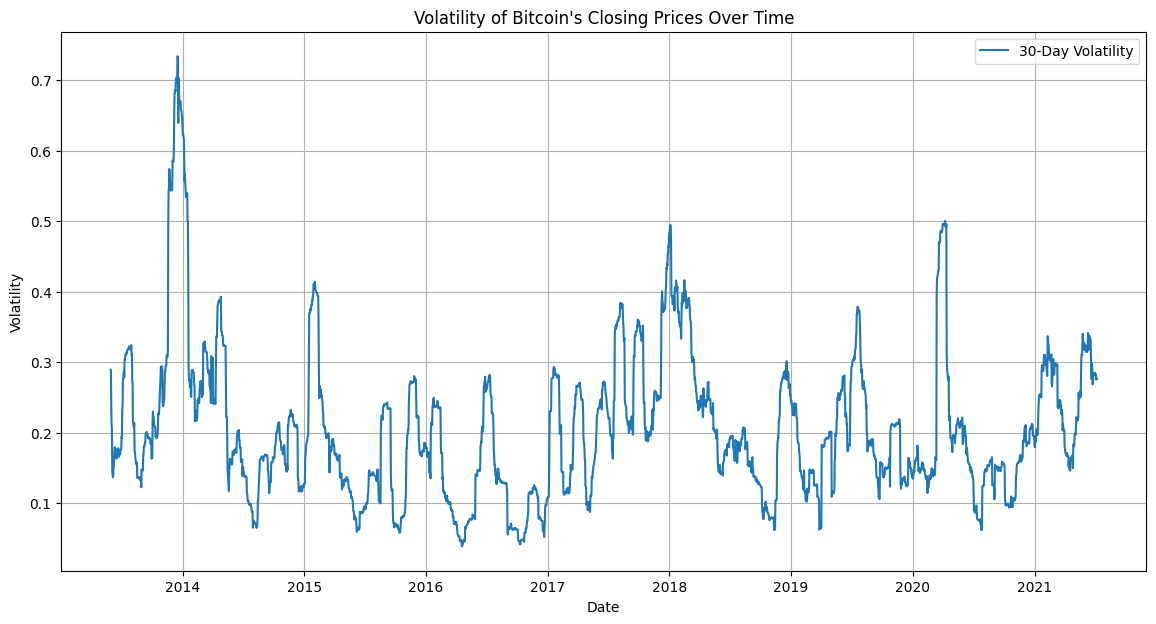

In [50]:
# Plot the rolling 30-day volatility
plt.figure(figsize=(14, 7))
plt.plot(dataset['Date'], dataset['30-Day Volatility'], label='30-Day Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title("Volatility of Bitcoin's Closing Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()

> The observed pattern of high volatility at the beginning of each year, particularly in the December-January-February period, suggests that there are specific factors or events driving significant price fluctuations during these times. Here are some possible interpretations:   

> Market Sentiment and Speculation : The end of the year often brings market evaluations, profit-taking, and tax considerations, which could contribute to increased trading activity and volatility.  
> Regulatory Announcements: The start of a new year may coincide with new regulatory announcements or changes in different countries, impacting market behavior.  
> Major News Events: Key developments, partnerships, technological advancements, or security breaches often occur around the beginning of the year.  
> Market Cycles: The cryptocurrency market tends to follow cyclical patterns, and the observed volatility could be part of these cycles.  

